In [1]:
%load_ext zipline

In [2]:
%pylab inline
figsize(12, 12)

Populating the interactive namespace from numpy and matplotlib


In [3]:
# 以下案例回测期间交易天数须大于300天

[2018-04-27 01:09:03.438331] INFO: zipline.finance.metrics.tracker: Simulated 803 trading days
first open: 2015-01-05 01:31:00+00:00
last close: 2018-04-20 07:00:00+00:00


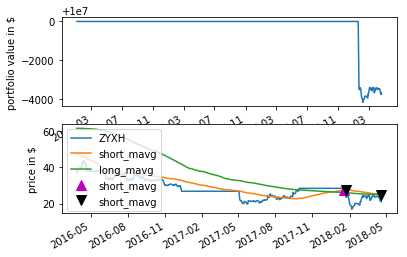

,ZYXH,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2015-01-05 07:00:00+00:00,NaN,NaN,0.000000,NaN,0.030516,NaN,NaN,0.0000,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,1,[],0.0
2015-01-06 07:00:00+00:00,NaN,0.000000,0.000000,0.000000,0.030380,0.344023,0.000000,0.0000,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,2,[],0.0
2015-01-07 07:00:00+00:00,NaN,0.000000,0.000000,0.000000,0.031153,0.276940,0.000000,0.0000,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,3,[],0.0
2015-01-08 07:00:00+00:00,NaN,0.000000,0.000000,0.000000,0.007231,0.349511,0.000000,0.0000,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,4,[],0.0
2015-01-09 07:00:00+00:00,NaN,0.000000,0.000000,0.000000,0.003684,0.305198,0.000000,0.0000,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,5,[],0.0
2015-01-12 07:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.005697,0.280911,0.000000,0.0000,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,6,[],0.0
2015-01-13 07:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.005566,0.256500,0.000000,0.0000,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,7,[],0.0
2015-01-14 07:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.008853,0.237927,0.000000,0.0000,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,8,[],0.0
2015-01-15 07:00:00+00:00,NaN,0.000000,0.000000,0.000000,0.019926,0.273526,0.000000,0.0000,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,9,[],0.0
2015-01-16 07:00:00+00:00,NaN,0.000000,0.000000,0.000000,0.028705,0.259804,0.000000,0.0000,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,10,[],0.0


In [4]:
%%zipline --start 2015-1-5 --end 2018-4-21
import matplotlib.pyplot as plt
from zipline.api import order_target, record, symbol

def initialize(context):
    context.i = 0
    context.asset = symbol('600645')


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 300:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=100, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=300, frequency="1d").mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 100)
    elif short_mavg < long_mavg:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(ZYXH=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)


def analyze(context, perf):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')

    ax2 = fig.add_subplot(212)
    perf['ZYXH'].plot(ax=ax2)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.short_mavg.ix[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.ix[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    plt.show()
